In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image

In [3]:
model = ResNet50(weights = 'imagenet', include_top = True)
model.summary()

102967424/102967424 [==============================] - 10s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                   

In [4]:
img_path = './cc.png'
img = image.load_img(img_path, target_size = (224,224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)
x = preprocess_input(x)
output = model.predict(x)

1/1 [==============================] - 10s 10s/step


In [5]:
top5 = decode_predictions(output, top = 5)[0]
print('Top5 predicted: ', top5)

Top5 predicted:  [('n02105412', 'kelpie', 0.15824793), ('n02104365', 'schipperke', 0.12251933), ('n02110806', 'basenji', 0.06532429), ('n02124075', 'Egyptian_cat', 0.03155578), ('n04409515', 'tennis_ball', 0.027390944)]


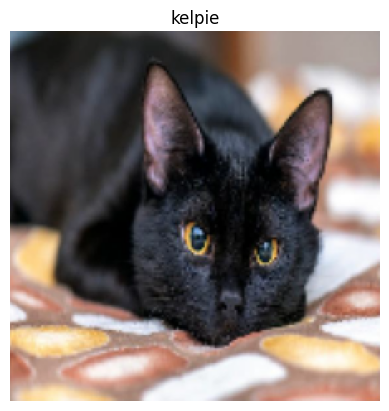

In [6]:
plt.imshow(img)
plt.title(top5[0][1])
plt.axis('off')
plt.show()